In [82]:
#%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [40]:
ps = set()
ts = set()
ns = set()

In [41]:
def parse(filename, res, ps, ns, ts):
    t, p = filename[-8:-4].split('-')[::-1][:2]
    with open(filename, 'rt') as f:
        for l in f.readlines():
            N, time = l.split(' ')[:2]
            key = (int(t), int(N), int(p))
#             ps += int(p)
#             ts += t
#             ns += n
            if key in res.keys():
                res[key] += np.float64(time)
            else:
                res[key] = np.float64(time)
    return res

In [42]:
res = {}
directory = '../results_copy/'
for p in [1, 2, 4, 8, 16, 32, 64]:
    for t in [1, 2, 4]:
        if p == 1 and t > 1:
            continue
        fname = directory + 'log_qr_par-' + str(p) + '-' + str(t) + '.txt'
        parse(fname, res, ps, ns, ts)
for key, tm in res.items():
    res[key] = tm / 3

In [58]:
# res

In [45]:
times = np.zeros(shape=(3, 9, 7), dtype=np.float64)
for logt in [0, 1, 2]:
    t = 2 ** logt
    for logN in range(8, 17):
        N = 2 ** logN
        for logp in range(0, 7):
            p = 2 ** logp
            key = (t, N, p)
            if key in res.keys():
                times[logt, logN - 8, logp] = res[key]
            else:
                times[logt, logN - 8, logp] = 1e-3

In [69]:
times[0, 4, :]

array([4.98433667e+02, 9.50471000e+00, 4.61488333e+00, 3.04557000e+00,
       2.50167000e+00, 2.44484000e+00, 1.00000000e-03])

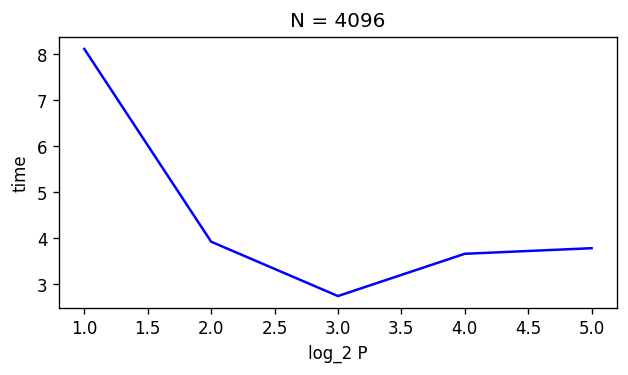

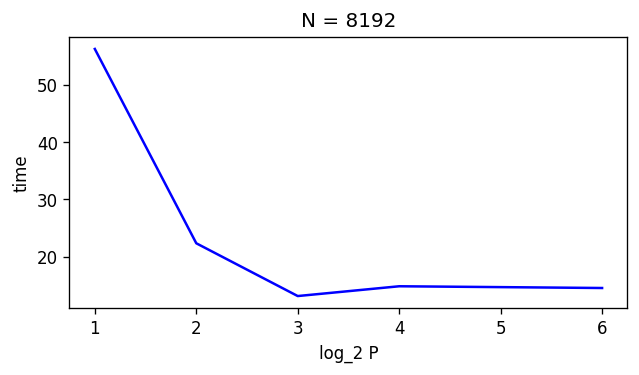

In [74]:
for k in [4, 5]:
    fig = plt.figure(figsize=(6, 3), dpi=120)

    ax = fig.add_subplot(111)
    ax.set_xlabel('log_2 P')
    ax.set_ylabel('time')
    ax.set_title('N = {}'.format(2 ** (8 + k)))

    ax.plot(range(1, k + 2), times[1, k, 1:k+2], color='b')
    plt.show()

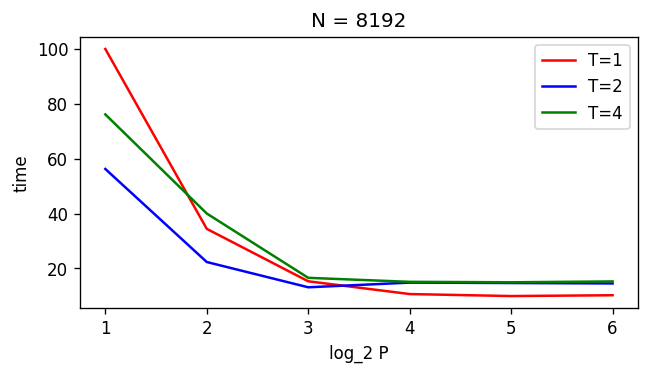

In [79]:
fig = plt.figure(figsize=(6, 3), dpi=120)

ax = fig.add_subplot(111)
ax.set_xlabel('log_2 P')
ax.set_ylabel('time')
ax.set_title('N = {}'.format(2 ** (8 + k)))

ax.plot(range(1, 7), times[0, 5, 1:7], color='r', label='T=1')
ax.plot(range(1, 7), times[1, 5, 1:7], color='b', label='T=2')
ax.plot(range(1, 7), times[2, 5, 1:7], color='g', label='T=4')
plt.legend()
plt.show()

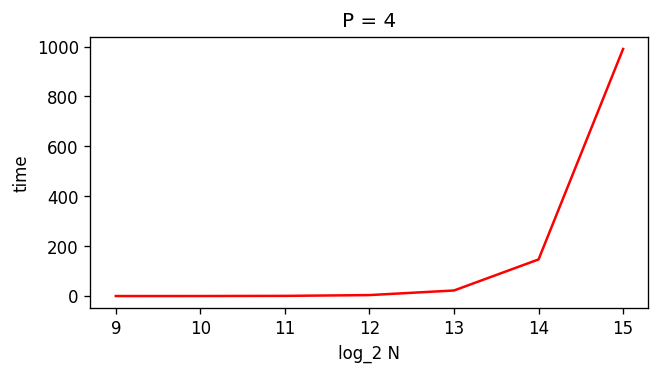

In [98]:
fig = plt.figure(figsize=(6, 3), dpi=120)

ax = fig.add_subplot(111)
ax.set_xlabel('log_2 N')
ax.set_ylabel('time')
ax.set_title('P = {}'.format(2 ** 2))

ax.plot(range(9, 16), times[1, 1:-1, 2], color='r')
plt.show()

In [93]:
times[1, :, 2]

array([1.00000000e-03, 6.88495000e-02, 1.68846333e-01, 7.48239333e-01,
       3.92575333e+00, 2.23501333e+01, 1.46751000e+02, 9.90355333e+02,
       1.00000000e-03])

<IPython.core.display.Javascript object>


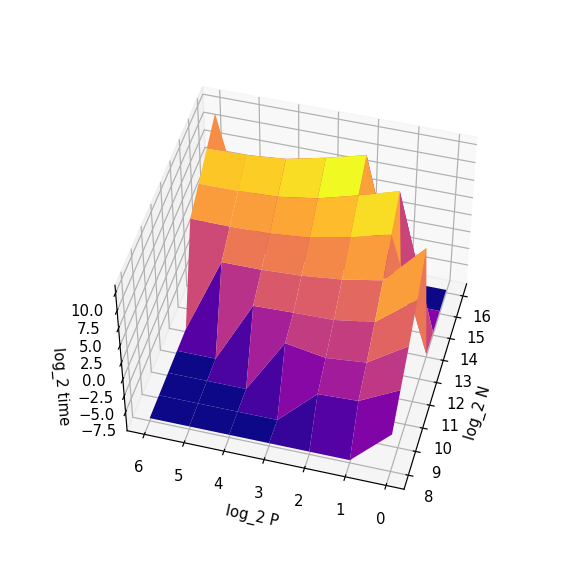

<IPython.core.display.Javascript object>


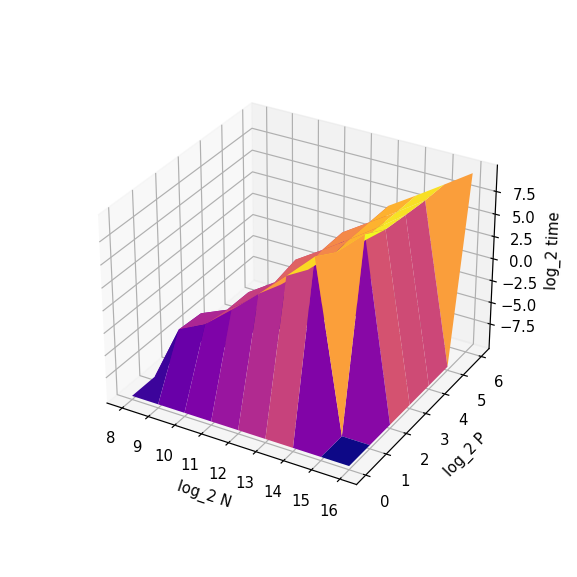

<IPython.core.display.Javascript object>


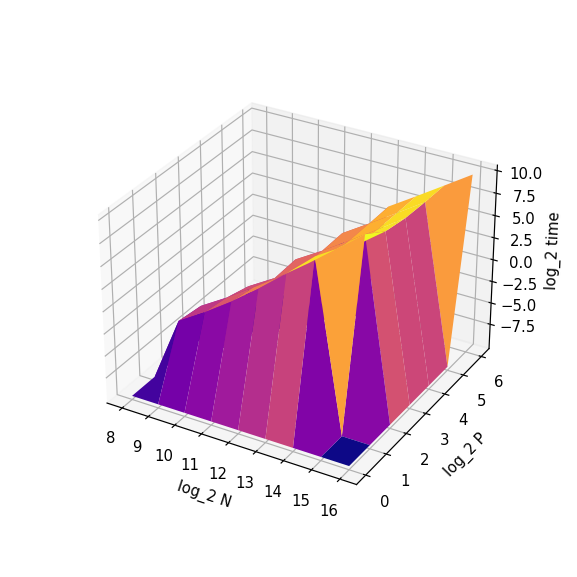

In [81]:

for logt in range(3):
    N = np.linspace(8, 16, 9)
    P = np.linspace(0, 6, 7)
    P, N = np.meshgrid(P, N)
    
    fig = plt.figure(figsize=(6, 6), dpi=120)

    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('log_2 N')
    ax.set_ylabel('log_2 P')
    ax.set_zlabel('log_2 time')

    ax.plot_surface(N, P, np.log2(times[logt, :, :]), cmap="plasma")
    plt.show()